In [4]:
from functools import cache
import os


@cache
def get_root():
    return os.path.dirname(os.path.dirname(os.path.abspath('main.py')))


In [5]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming `df` is your dataset
df = pd.read_csv(f"{get_root()}/research/train.csv")
df = df.dropna(subset=['ID', 'LABEL'])

df = df.fillna(0)
df

,X_FROM,X_TO,LABEL,ID,AGE_MONTHS,EXPERIMENT_TYPE,DWT_Energy_Level_1_FrL,DWT_Energy_Level_2_FrL,DWT_Energy_Level_3_FrL,DWT_Energy_Level_4_FrL,...,DWT_Energy_Level_5_OcR,DWT_Energy_Level_6_OcR,Delta_Power_OcR,Theta_Power_OcR,Alpha_Power_OcR,Beta_Power_OcR,Hjorth_Activity_OcR,Hjorth_Mobility_OcR,Hjorth_Complexity_OcR,Shannon_Entropy_OcR
0,0.0,20.0,EMPTY,Ati4y3,12m,BL,40.243290,14.290934,9.893603,2.401972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,40.0,EMPTY,Ati4y3,12m,BL,58.678593,16.748471,9.337472,2.445853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.0,60.0,EMPTY,Ati4y3,12m,BL,77.330532,29.150398,19.905851,4.116761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,80.0,EMPTY,Ati4y3,12m,BL,54.998859,29.226025,13.330065,3.561856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80.0,100.0,EMPTY,Ati4y3,12m,BL,13.741637,11.357755,7.178042,2.873398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46432,21500.0,21520.0,EMPTY,Ati4x6,14m,BL,52.617499,124.412488,82.082483,27.668242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46433,21520.0,21540.0,EMPTY,Ati4x6,14m,BL,16.606064,19.085410,13.323058,3.959935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46434,21540.0,21560.0,EMPTY,Ati4x6,14m,BL,12.642552,4.407332,3.386350,3.536049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46435,21560.0,21580.0,EMPTY,Ati4x6,14m,BL,14.707468,25.023182,10.716498,4.145588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

cat_features = ['AGE_MONTHS', 'EXPERIMENT_TYPE']

# Encode target labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])  # Transform 'ds', 'is', 'swd' into numeric

# Split features and target
X = df.drop(columns=['LABEL','ID', 'X_FROM', 'X_TO'])
y = df['LABEL']

# Initialize CatBoost classifier with categorical features
catboost_params = {
    'iterations': 100,
    # 'depth': 6,
    'loss_function': 'MultiClass'
}
catboost_model = CatBoostClassifier(**catboost_params)

# Cross-validation setup
data_pool = Pool(X, y, cat_features=cat_features)
cv_results = cv(
    params=catboost_params,
    pool=data_pool,
    fold_count=3,
    plot=True,
)

# Print CV results
print(cv_results)

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)

# Train the model
catboost_model.fit(train_pool, verbose=100)

# Predict and evaluate
y_pred = catboost_model.predict(test_pool)


CatBoostError: catboost/private/libs/target/target_converter.cpp:404: Target contains only one unique value

In [14]:
y_pred.transform

array([[2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [2],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
    

In [7]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          ds       0.97      0.97      0.97        29
          is       1.00      1.00      1.00         9
         swd       0.99      0.99      0.99        76

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Figure size 640x480 with 0 Axes>

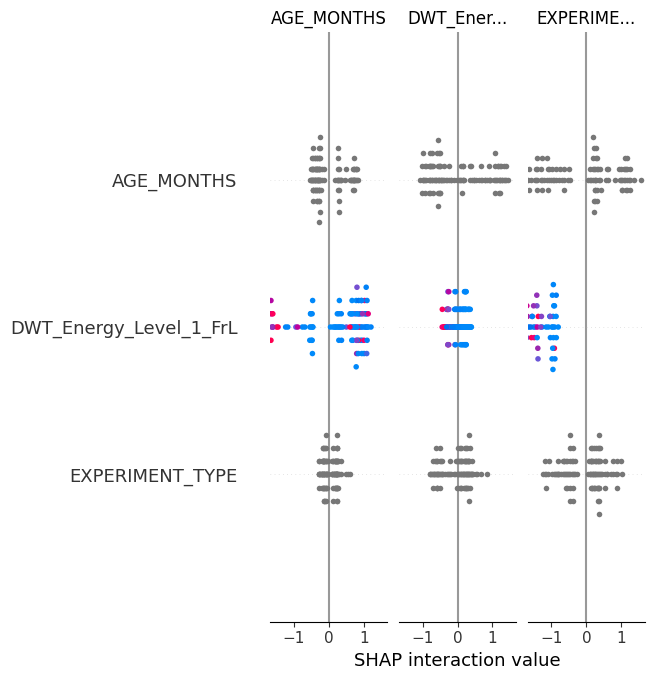

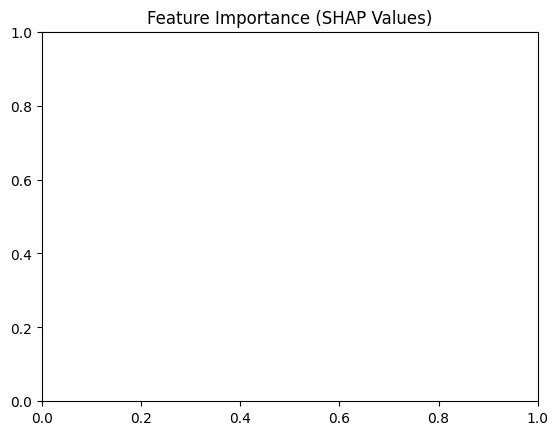

<Figure size 640x480 with 0 Axes>

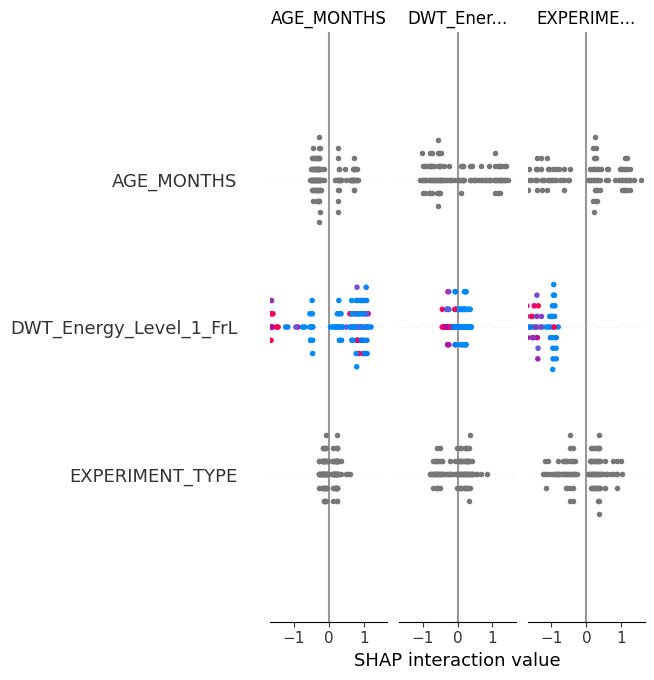

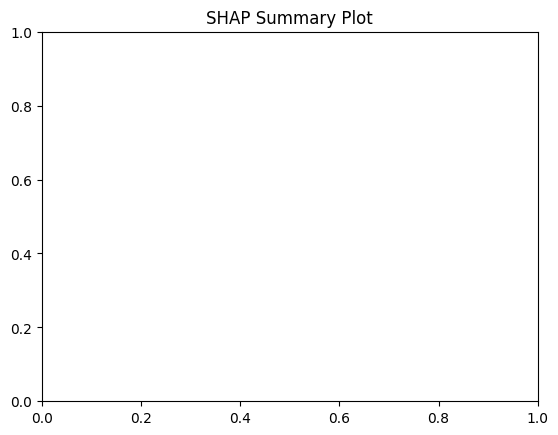

In [11]:
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# SHAP Feature Importance
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for feature importance
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP Values)")
plt.show()

# SHAP Summary Plot (detailed)
plt.figure()
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot")
plt.show()

In [1]:

# SHAP Feature Importance (Bee Swarm Plot)
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (Bee Swarm)
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="dot")  # 'dot' for bee swarm
plt.title("SHAP Feature Importance (Bee Swarm Plot)")
plt.show()

# CatBoost Built-in Feature Importance
feature_importances = catboost_model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot CatBoost Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

NameError: name 'shap' is not defined